# Projeto de molas

In [1]:

from IPython.display import Image
from numpy import pi, cos, sin, sqrt


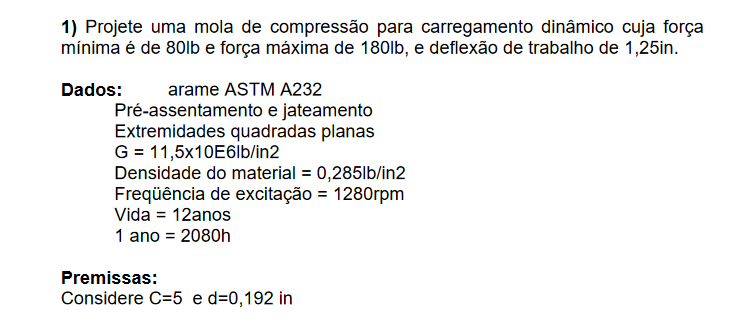

In [2]:
Image('../dados/imagens/projeto_molas.PNG')

In [3]:

# Forças caregamento dinâmico [lb]
Fmin = 40

# deflexão de trabalho [in]
y = 0.5

# cte mola [lb/in]
k = 80

# Força máxima
Fmax = k*y + Fmin

Fmax


80.0

In [29]:

# frequência de excitação [Hz]
fn_exe = 50
omega = 2*pi*50 * 60

# rpm
omega


18849.55592153876

In [5]:

# arame ASTM A232

# [lb/in2]
G = 11.5e6

# densidade do material [lb/in2]
ro = 0.285

# tempo de vida [anos]
vida = 12

# tempo no ano [horas]
ano = 2080

# índice da mola [adimensional]
C = 7

# diâmetro interno [in]
d = 0.177

# gravidade [in/s2]
g = 386


In [6]:

# número de ciclos da mola = RPM * min/h * hora/turno:ano * 12 anos [milhões de ciclos]
Nvida = omega * 60 * ano * vida

Nvida*1e-6


28229.09494809644

In [7]:

# força alternada e média na mola [lb]
Fa = (Fmax - Fmin)/2
Fm = (Fmax + Fmin)/2

Fa, Fm


(20.0, 60.0)

In [35]:
C, d

(7, 0.177)

In [8]:

# diâmetro médio da espira [in]
D = C * d

D


1.2389999999999999

In [36]:
Fmin, D, d

(40, 1.2389999999999999, 0.177)

In [9]:

# Fator de cisalhamento Ks, Tensão inicial e Tensão média

Ks = 1 + 0.5/C # adimensionaç

tau_i = Ks * (8*Fmin*D) / (pi*d**3) # psi

tau_m = Ks * (8*Fm*D) / (pi*d**3)   # psi

Ks, tau_i, tau_m


(1.0714285714285714, 24384.555103613195, 36576.83265541979)

In [10]:

# Fator de Wahl Kw, Tensão Alternada
Kw = (4*C - 1)/(4*C - 4) + 0.615/C

tau_a = Kw * (8*Fa*D) / (pi*d**3)

Kw, tau_a


(1.2128571428571429, 13801.658188645068)

In [37]:
d

0.177

In [11]:

import numpy as np

# limite de resistência a tração
# limite de resistência ao cisalhamento
# limite de resistência a torção

# arame A229 (tabela)
A, b = 146780, -0.1833

Sut = A*d**b
Sus = 0.67*Sut
Sys = 0.65*Sut

np.round([Sut, Sus, Sys]).tolist()


[201611.0, 135079.0, 131047.0]

In [12]:

# Limite de resistência a fadiga (molas jateadas) [psi]
Sew = 67500

Ses = 0.5 * (Sew*Sus)/(Sus - 0.5*Sew)

Ses


44991.217006882725

In [13]:

# Coeficiente de segurança a fadiga
Nf = Ses*(Sus - tau_i) / (Ses*(tau_m-tau_i) + Sus*tau_a)

Nf


2.0640569401820317

In [14]:

# # Constante da mola [lb/in]
# k = (Fmax-Fmin)/y

# k


In [38]:
d, G, D, k

(0.177, 11500000.0, 1.2389999999999999, 80.19462611299346)

In [15]:

# Número de espiras ativas 
Na = d**4 * G / (8* D**3 * k)

Na

9.272503644314869

In [16]:

# deve ser multiplo de 1/4
Na = 9.25


In [17]:

# Constante da mola corrigida [lb/in]
k = d**4 * G / (8 * D**3 * Na)

k


80.19462611299346

In [18]:

# Número total de espira (extremidades esquadrejadas e esmerilhadas)
Nt = Na + 2

Nt 


11.25

In [19]:

# Comprimento fechado [in]
Ls = d*Nt

Ls


1.99125

In [39]:
Fmin, k

(40, 80.19462611299346)

In [20]:

# Deflexão inicial [ln]
y_inicial = Fmin/k

y_inicial


0.4987865389339229

In [40]:
y

0.5

In [21]:

# Tolerância de contato (15%)
y_interf = 0.15*y

y_interf # [in]


0.075

In [23]:

# Comprimento livre [in]
Lf = Ls + y_inicial + y + y_interf

Lf


3.065036538933923

In [42]:
k

80.19462611299346

In [24]:

# Deflexão máxima e Força máxima
y_max = Lf - Ls
Fmax  = k*y_max

y_max, Fmax # (in, lb)


(1.073786538933923, 86.11191001497124)

In [25]:

# Tensão máxima fechada e coeficiente de segurança
tau_max   = Ks * 8 * Fmax * D / (pi*d**3)

N_fechado = Sys/tau_max 

tau_max, N_fechado # [psi] [adimensional]


(52495.01537093618, 2.4963683803706402)

In [32]:

# Frequência natural da mola
w = pi**2 * d**2 * D * Na * ro / 4 # [lb]

fn = 1/2* sqrt(k*g/w) # Hz

w, fn


(0.2524900020783771, 175.0709938568438)

In [31]:

# # ciclos / min
# fn *= 60

# fn


In [33]:

# freq natural / freq aplicada
fn/fn_exe

# é menor que 13x porém é aceitável


3.5014198771368763

In [34]:

# Verificação da flambagem
Lf/D, y_max/Lf

# verificar no gráfico das relações (se é mola paralela ou não)


(2.4737986593494132, 0.3503340091689106)

$$$$
R: estável

$$$$
### Obervações
$$$$

Se o cálculo acima gerar um ponto no gráfico de instabilidade, deve-se aumentar o índice da mola ($C  \simeq 10$) e refazer o dimensionamento.

Caso em um novo exercício não possua força alternada (carga constante), deve-se calcular apenas força máxima, dispensando os cálculos de $N_{f}$ (fadiga) e frequência.

$$$$